<a href="https://colab.research.google.com/github/Nelokaby/Machine-Learning-projects/blob/main/Predicting_using_Decision_Tree_Algorithm_(Task_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 6 : Predicting using Decision Tree Algorithm**
##### *GRIP @ The Sparks Foundation*



### **Author: Nada Mahmoud Elokby**
#### *Data Science & Business Analytics Intern*
###### *september 2022*

Here, our main objective is to create a Decision Tree classifier and visualize it graphically and if we feed any new data to this classifier, i would be able to predict the right class accordingly.

Dataset I used: https://bit.ly/3kXTdox

### **1.Importing Required Libraries**

In [1]:
!pip install pydotplus
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [36]:
import pandas as pd
import numpy as np
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# fixing the random seed
random.seed(0)


### **2.Performing the EDA (Exploratory Data Analysis)**

In [5]:
# reading the iris file
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#drop unimportant columns
df.drop("Id",axis=1,inplace=True)

In [9]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


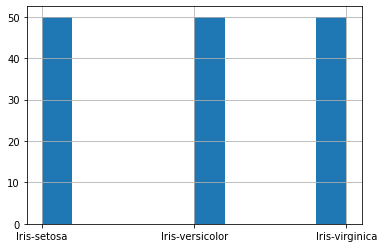

In [35]:
#check if the data is balanced
df["Species"].hist()

### **3. split the dataframe to features and labels datasets**

In [10]:
# creating the features dataset
x=df.drop("Species",axis=1)
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
#creating the labels dataset
y=df["Species"]
y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### **4. performing "train test split" 80% 20%**

In [16]:
#split the data to train & test 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("train length=" ,len(X_train))

train length= 120


### **5. create and train the model**

In [17]:
# Defining the decision tree algorithm
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [31]:
#getting the accuracy of the model
score= DT.score(X_train,y_train)
print("the model accuracy on the training dataset = ",score )

the model accuracy on the training dataset =  1.0


In [32]:
#getting the accuracy of the test
y_predicted = DT.predict(X_test)

#if you want to take a look on the predicted labels and the actual labels
print("predicted labels: ",y_predicted )
print("actual labels: ",y_test.values)

print("---------------------------------------------------------------------")
print("the model accuracy on the testing dataset = ",DT.score(X_test,y_test))

predicted labels:  ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
actual labels:  ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'

### **6. finally visualizing the Decision tree graph**

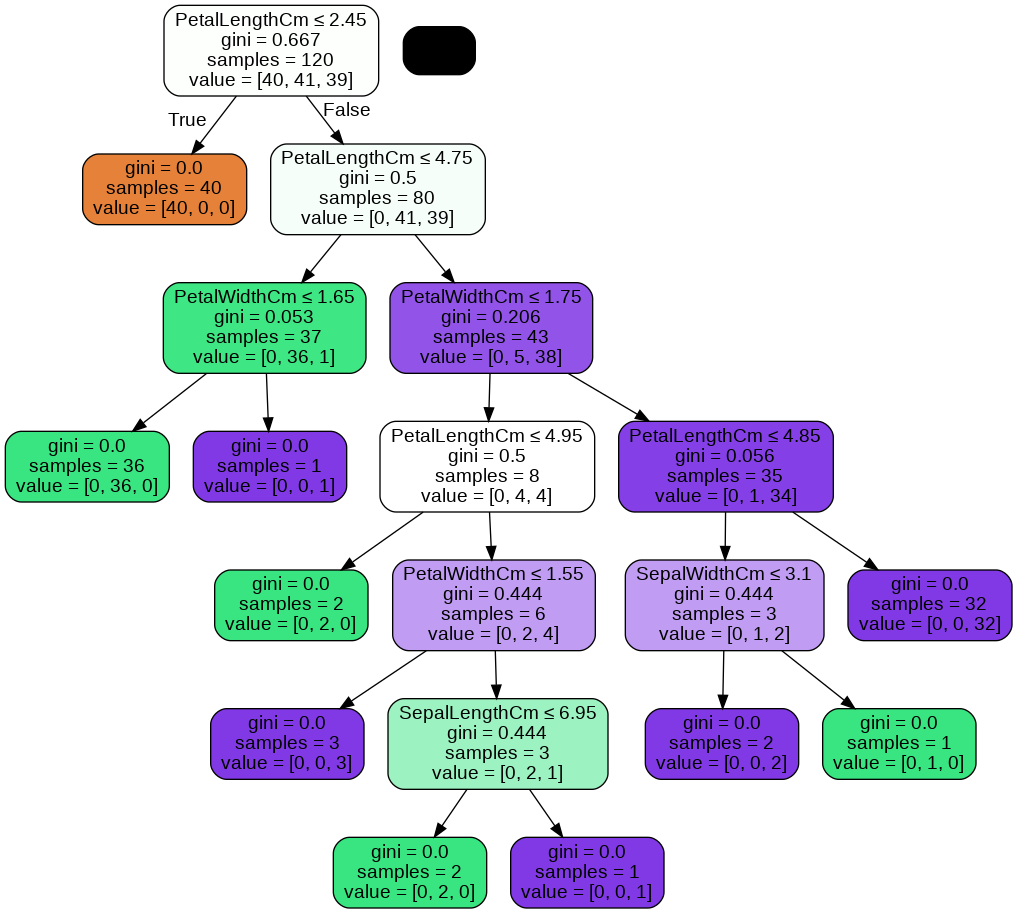

In [30]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=x.columns.to_list(),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())